# 最適化ソルバー: Q-CTRL Fire Opal による Qiskit Function

<Admonition type="note">
  Qiskit Functions は、IBM Quantum™ Premium Plan ユーザーのみが利用できる実験的な機能です。プレビュー リリースの状態であり、変更される可能性があります。
</Admonition>

## 概要

Fire Opal 最適化ソルバーを使用すると、量子の専門知識を必要とせずに、量子ハードウェア上でユーティリティー規模の最適化問題を解くことができます。ハイレベルの問題定義を入力するだけで、あとはソルバーが処理します。ワークフロー全体はノイズを考慮しており、[Fire Opal の Performance Management](/guides/q-ctrl-performance-management) を裏で活用しています。ソルバーは、IBM® の最も大きな QPU上でフルデバイススケールであっても、古典的には難問に対して一貫して正確な解を提供します。

ソルバーは柔軟性があり、目的関数または任意のグラフとして定義された組み合わせ最適化問題を解くことができます。問題をデバイス トポロジーにマッピングする必要はありません。制約をペナルティー項として定式化できる場合、制約なしの問題と制約付きの両方の問題を解くことができます。このガイドに含まれる例では、さまざまなソルバー入力タイプを使用して、制約なしおよび制約付きのユーティリティースケールの最適化問題を解く方法を示します。最初の例では、156 ノードの 3 正則グラフで定義された最大カット問題を、2 番目の例では、コスト関数で定義された 50 ノードの最小頂点カバー問題に取り組んでいます。

最適化ソルバーにアクセスするには、[このフォームに記入してください。](https://quantum.ibm.com/functions?id=a8a2b0b6-486a-41b5-8ea4-ada3b108d6b6)


## 機能説明

ソルバーは、ハードウェアレベルでのエラー抑制から効率的な問題マッピング、閉ループの古典的最適化まで、アルゴリズム全体を完全に最適化し、自動化します。舞台裏では、ソルバーのパイプラインがあらゆる段階でエラーを削減し、有意義なスケーリングに必要な性能向上を可能にします。基礎となるワークフローは、ハイブリッド量子古典アルゴリズムである量子近似最適化アルゴリズム（QAOA）にインスパイアされています。最適化ソルバーのワークフローの詳細な概要については、[公開された原稿](https://arxiv.org/abs/2406.01743)を参照してください。

![Visualization of the Optimization Solver workflow](./images/guides/qctrl-optimization/solver_workflow.svg)

最適化ソルバーで一般的な問題を解くには

1.  問題を目的関数またはグラフとして定義します。
2.  Qiskit Functions Catalog を通して関数に接続します。
3.  ソルバーで問題を実行し、結果を取得します。

## 入力と出力


### 入力

			

| 名前          | タイプ  | 説明                                                                                                                          | 必須	 | 例                                                                                                                                                          |
| ------------- | ------ | ------------------------------------------------------------------------------------------------------------------------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| problem       | `str`  | 下の「受け入れられる問題形式」にリストされている表現の 1 つ。                                                                  | Yes      | `Poly(2.0*n[0]*n[1] + 2.0*n[0]*n[2] - 3.13520241298341*n[0] + 2.0*n[1]*n[2] - 3.14469748506794*n[1] - 3.18897660121566*n[2] + 6.0, n[0], n[1], n[2], domain='RR')` |
| problem\_type | `str`  | 問題クラスの名前。これは、目的を決定するためのグラフ問題定義にのみ使用されます。現在は「maxcut」に制限されています。 | No       | `“maxcut”`                                                                                                                                                         |
| instance      | `str`  | その形式で使用する hub/group/project                                                                                          | Yes      | `“hub1/group1/project1”`                                                                                                                                           |
| run\_options  | `dict` | 入力オプションには、次のものが含まれます: (Optional) `backend_name`: 文字列。 デフォルトは、最も使用頻度の低いバックエンドです。                            | No       | `{“backend_name”: “ibm_fez"}`                                                                                                                                      |

**受け入れられる問題形式::**

*   目的関数の多項式表現。理想的には、既存の SymPy Poly オブジェクトを使用して Python で作成し、[sympy.srepr](https://docs.sympy.org/latest/tutorials/intro-tutorial/printing.html#srepr) を使用した文字列がフォーマットです。

*   特定の問題タイプのグラフ表現。グラフは、Python の networkx ライブラリーを使用して作成する必要があります。次に、networkx 関数 `[nx.readwrite.json_graph.adjacency_data](http://nx.readwrite.json_graph.adjacency_data.)` を使用して文字列に変換する必要があります。

### 出力

| 名前          | タイプ             | 説明                                                      | 例                                                                                                                                                                                                                                                                                                                          |
| ------ | ---------------- | --------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| result | `dict[str, Any]` | 「Result の辞書の内容」 の下にリストされているSolution と metadata | `{‘solution_bitstring_cost’: 3.0, ‘final_bitstring_distribution’: {‘000001’: 100, ‘000011’: 2}, ‘iteration_count’: 3, ‘solution_bitstring’: ‘000001’,  'variables_to_bitstring_index_map': {n[1]': 5, 'n[2]': 4, 'n[3]': 3, 'n[4]': 2, 'n[5]': 1}, 'best_parameters': [0.19628831763697097, -1.047052334523102], 'warnings': []}` |

**Result の辞書の内容:**

| 名前          | タイプ             | 説明                                                              |
| ------------------------------------ | ------------- | ------------------------------------------------------------------------ |
| solution\_bitstring\_cost            | `float`       | すべての反復にわたる最良の最小コスト                            |
| final\_bitstring\_distribution       | `CountsDict`  | 最小コストに関連付けられたbitstringのカウント辞書         |
| solution\_bitstring                  | `str`         | 最終分布においてコストが最も良いbitstring                   |
| iteration\_count                     | `int`         | ソルバーによって実行されたQAOA反復の合計数              |
| variables\_to\_bitstring\_index\_map | `float`       | 変数からbitstring内の同等のビットへのマッピング    |
| best\_parameters                     | `list[float]` | すべての反復にわたって最適化されたbetaとgammaパラメーター          |
| warnings                             | `list[str]`   |  QAOA のコンパイルまたは実行中に生成された警告 (デフォルトはなし)|



## ベンチマーク

[公開されたベンチマーク結果](https://arxiv.org/abs/2406.01743)では、ソルバーが120量子ビットを超える問題を解くことに成功しており、量子アニーリングやトラップドイオンデバイスに関する既発表の結果をも上回っています。以下のベンチマーク指標は、いくつかの例に基づいて、問題タイプの精度とスケーリングを大まかに示すものです。実際の評価指標は、目的関数の項数（密度）やその局所性、変数の数、多項式の次数など、さまざまな問題の特徴によって異なる可能性があります。

表示されている「」は厳密な制限ではありませんが、極めて一貫した解の精度が期待できる大まかな閾値を表しています。これより大きな問題サイズでも解決に成功しており、これらの限界を超えてテストすることが推奨されます。
すべての問題タイプにおいて、任意の量子ビットの接続性がサポートされています。
量子ビットの数	例	正確さ	合計時間（秒）	ランタイム使用量	反復回数

| 問題の種類	                           | 量子ビット数 | 例	                                           | 精度 |合計時間（秒） | Runtime usage (s) | 反復回数 |
| -------------------------------------- | ---------------- | -------------------------------------------------- | -------- | -------------- | ----------------- | -------------------- |
| 疎結合2次問題  | 156              | 3-regular Max-Cut                                  | 100%     | 1764           | 293               | 16                   |
| 高次二元最適化       | 156              | Ising spin-glass model                             | 100%     | 1461           | 272               | 16                   |
| 密結合2次問題   | 50               | Fully-connected Max-Cut                            | 100%     | 1758           | 268               | 12                   |
| ペナルティ項を持つ制約問題 | 50               | Weighted Minimum Vertex Cover with 8% edge density | 100%     | 1074           | 215               | 10                   |



## 始めてみましょう

[IBM Quantum API token](http://quantum.ibm.com/)を使用して認証し、次のように Qiskit Functionを選択します。

In [ ]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

# Credentials
token = "<YOUR_IQP_API_TOKEN>"
hub = "<YOUR_IQP_HUB>"
group = "<YOUR_IQP_GROUP>"
project = "<YOUR_IQP_PROJECT>"

# Authentication
catalog = QiskitFunctionsCatalog(token=token)

# Access Function
solver = catalog.load('q-ctrl/optimization-solver')

## 例: 制約のない最適化

[最大カット(Max-Cut)](https://en.wikipedia.org/wiki/Maximum_cut) 問題を実行します。次の例は、120 ノード、3正則の非重みつきグラフの最大カット問題に対するソルバーの機能を示していますが、重み付けされたグラフの問題も解くことができます。

`qiskit-serverless` パッケージに加えて、この例を実行するために以下のパッケージも使用します： `NetworkX`、`PuLP`、`NumPy`です。IPythonカーネルを使用してノートブックでこの例を実行している場合、以下のセルのコメントを外すことでこれらのパッケージをインストールできます。

In [ ]:
# %pip install networkx numpy

### 1. 問題を定義する

グラフ問題を定義し、`problem_type='maxcut'`と指定することで、最大カット問題を実行することができます。

In [2]:
import networkx as nx
import pulp
import numpy as np

# Generate a random graph with 120 nodes
maxcut_graph = nx.random_regular_graph(d=3, n=156, seed=8)

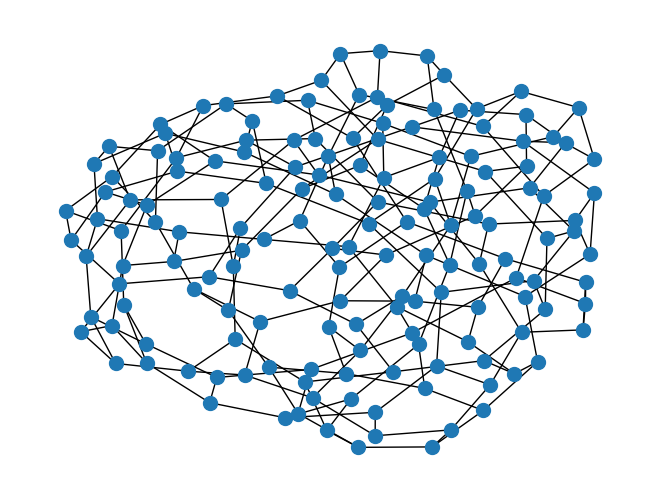

In [4]:
# Optionally, visualize the graph
nx.draw(maxcut_graph, nx.kamada_kawai_layout(maxcut_graph), node_size=100)

ソルバーは、問題定義の入力として文字列を受け入れます。

In [5]:
# Convert graph to string
problem_as_str = nx.readwrite.json_graph.adjacency_data(maxcut_graph)

### 2. 問題を実行する

グラフベースの入力方法を使用する場合は、問題の種類を指定します。

In [14]:
# Solve the problem
maxcut_job = solver.run(
    problem = problem_as_str,
    problem_type = "maxcut",
    instance = hub + "/" + group + "/" + project
)

使い慣れた [Qiskit Serverless APIs](https://docs.quantum.ibm.com/guides/qiskit-serverless) を使用して、Qiskit Function ワークロードのステータスを確認できます。

In [ ]:
# Get job status
print(maxcut_job.status())

### 3. 結果を取得する

結果の辞書から最適なカット値を取得します。

<Admonition type="note">
変数のビット文字列へのマッピングが変更されている可能性があります。出力辞書には `variables_to_bitstring_index_map` サブ辞書が含まれており、順序を確認するのに役立ちます。
</Admonition>



In [15]:
# Poll for results
maxcut_result = maxcut_job.result()

# Take the absolute value of the solution since the cost function is minimized
qctrl_maxcut = abs(maxcut_result["solution_bitstring_cost"])

# Print the optimal cut value found by the Optimization Solver
print(f"Optimal cut value: {qctrl_maxcut}")

Optimal cut value: 210.0


グラフが密に接続されていない場合は、 [PuLP](https://coin-or.github.io/pulp/) などのオープンソース ソルバーを使用して問題を古典的に解くことで、結果の精度を検証できます。高密度の問題では、ソリューションを検証するために高度な古典的ソルバーが必要になる場合があります。

## 例: 制約付き最適化

前述の最大カットの例は、一般的な 2 次制約なしバイナリ最適化問題です。Q-CTRL の最適化ソルバーは、制約付き最適化を含むさまざまな問題タイプに使用できます。制約がペナルティー項としてモデル化されている多項式として表される問題定義を入力することで、任意の問題タイプを解決できます。

次の例は、制約付き最適化問題である[最小頂点被覆問題(minimum vertex cover, MVC)](https://en.wikipedia.org/wiki/Vertex_cover)のコスト関数を構築する方法を示しています。

`qiskit-ibm-catalog` と `qiskit` パッケージに加えて、このサンプルを実行するために以下のパッケージも使用します: `NumPy`、`NetworkX`、`SymPy` および `PuLP`です。IPythonカーネルを使用しているノートブックでこのサンプルを実行する場合は、以下のセルをアンコメントすることでこれらのパッケージをインストールすることができます。

In [ ]:
# %pip install numpy networkx sympy

### 1. 問題を定義する

ランダムに重み付けされたノードを持つグラフを生成することで、ランダム MVC 問題を定義します。



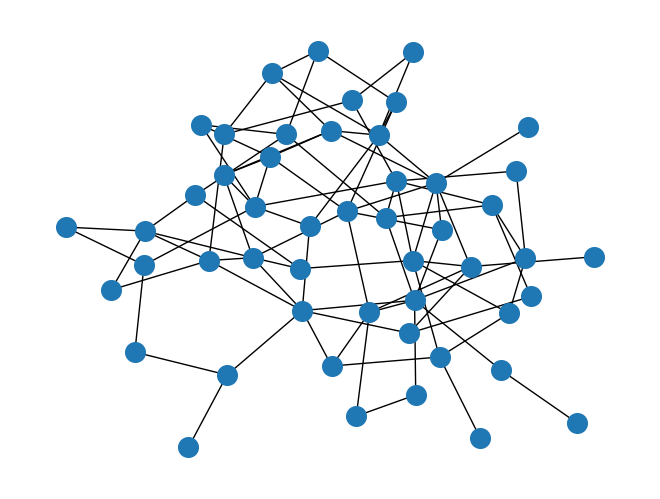

In [19]:
import numpy as np
import networkx as nx
from sympy import symbols, Poly
import pulp

# To change the weights, change the seed to any integer.
rng_seed = 18
_rng = np.random.default_rng(rng_seed)
node_count = 50
edge_probability = 0.08
mvc_graph = nx.erdos_renyi_graph(
    node_count, edge_probability, seed=rng_seed, directed=False
)

# add node weights
for i in mvc_graph.nodes:
    mvc_graph.add_node(i, weight=_rng.random())

# Optionally, visualize the graph
nx.draw(
    mvc_graph,
    nx.kamada_kawai_layout(mvc_graph),
    node_size=200,
)

重み付き MVC の標準的な最適化モデルは、次のように定式化できます。まず、エッジがサブセット内の頂点に接続されていない場合は、ペナルティーを追加する必要があります。したがって、頂点 $i$ がカバー内 (つまり、サブセット内) にある場合は $n_i = 1$、それ以外の場合は $n_i = 0$ とします。次に、サブセット内の頂点の総数を最小化することが目標であり、これは次の関数で表すことができます：

$\textbf{Minimize}\qquad y = \sum_{i\in V} \omega_i n_i$



In [21]:
# Construct the cost function.
variables = symbols([f"n[{i}]" for i in range(node_count)])
cost_function = Poly(0, variables)

for i in mvc_graph.nodes():
    weight = mvc_graph.nodes[i].get("weight", 0)
    cost_function += variables[i] * weight

これで、グラフ内のすべてのエッジにカバーからの少なくとも 1 つのエンドポイントが含まれるようになり、これは以下の不等式として表現できます：

$n_i + n_j \ge 1 \texttt{ for all } (i,j)\in E$


エッジがカバーの頂点に接続されていない場合は、ペナルティを課す必要があります。これは、コスト関数で $P(1-n_i-n_j+n_i n_j)$ の形式のペナルティを追加することで表すことができます。ここで、$P$ は正のペナルティー定数です。したがって、重み付き MVC の制約付き不等式の制約なしの代替は次のようになります：


$\textbf{Minimize}\qquad y = \sum_{i\in V}\omega_i n_i + P(\sum_{(i,j)\in E}(1 - n_i - n_j + n_i n_j))$



In [23]:
# Add penalty term.
penalty_constant = 2
for i, j in mvc_graph.edges():
    cost_function += penalty_constant * (
        1 - variables[i] - variables[j] + variables[i] * variables[j]
    )

### 2. 問題を実行する



In [ ]:
# Solve the problem
mvc_job = solver.run(
    problem = sympy.srepr(cost_function),
    instance = hub + "/" + group + "/" + project
)

Qiskit Function ワークロードのステータスは次のように確認できます：



In [ ]:
print(mvc_job.status())

### 3. 結果を取得する

解を取得し、結果を分析します。この問題には重み付けされたノードがあるため、解は単にカバーされるノードの最小数ではありません。代わりに、解のコストは、頂点カバーに含まれる頂点の重みの合計を表します。これは、選択された頂点を使用してグラフ内のすべてのエッジをカバーする合計の「コスト」または「重み」を表します。


In [ ]:
mvc_result = mvc_job.result()
qctrl_cost = mvc_result["solution_bitstring_cost"]

# Print results
print(f"Solution cost: {qctrl_cost}")

Solution cost: 10.248198273708624


## サポートを受ける

ご質問や問題がある場合は、[Q-CTRL までお問い合わせください。](https://form.typeform.com/to/iuujEAEI?typeform-source=q-ctrl.com).



## Next steps次のステップ

  *   [Q-CTRL最適化ソルバー](https://quantum.ibm.com/functions?id=a8a2b0b6-486a-41b5-8ea4-ada3b108d6b6)へのアクセスをリクエスト
  *   [Q-CTRL の最適化ソルバーを使用して高次バイナリ最適化問題を解決する](https://learning.quantum.ibm.com/tutorial/solve-higher-order-binary-optimization-problems-with-q-ctrls-optimization-solver) チュートリアルをお試しください。

